### This Notebook contains a regression analysis to understand the relationship of infrastructure in determining ease-of-doing-business in Indian context

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Collaborating all the dataframes, in a merged dataframe

df = pd.read_csv(glob("*.csv")[0])
df = df.set_index("States")

for csv_file in glob("*.csv")[1:]:
    df_temp = pd.read_csv(csv_file)
    df_temp = df_temp.set_index("States")
    df = df.join(df_temp)
    
df

,bus_2015,bus_2016,bus_2017,loss_2015,loss_2016,loss_2017,pow_2015,pow_2016,pow_2017,rail_2015,rail_2016,rail_2017,high_2015,high_2016,high_2017
States,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,9.73,0.30,1.25,20.5,14.4,10.7,473.8,473.8,789.6,NaN,NaN,NaN,279.0,266.0,266.0
Andhra Pradesh,70.12,98.78,98.30,17.9,16.2,16.2,1019.8,1098.6,1180.3,3657.0,3703.0,3817.0,6485.0,6485.0,6485.0
Arunachal Pradesh,1.23,0.30,0.00,46.2,50.6,49.4,427.5,515.7,570.7,12.0,12.0,12.0,NaN,NaN,NaN
Assam,14.48,14.29,84.75,27.6,25.2,25.0,265.4,278.9,281.7,2471.0,2443.0,2440.0,2530.0,2530.0,2530.0
Bihar,16.41,75.82,81.91,46.3,42.8,30.3,227.9,242.1,256.3,3652.0,3731.0,3714.0,4426.0,4253.0,4006.0
Chandigarh,10.04,0.30,11.54,19.1,18.7,18.0,1523.7,1559.7,1518.0,16.0,16.0,16.0,NaN,NaN,NaN
Chhattisgarh,62.45,97.32,97.31,29.2,30.8,25.6,991.0,927.9,1011.4,1196.0,1213.0,1216.0,4374.0,4462.0,4438.0
Dadra & Nagar Haveli,0.00,1.79,21.88,10.3,10.1,10.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daman & Diu,0.00,14.58,28.69,29.6,31.8,32.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.to_csv('Final_dataset.csv')

In [5]:
# Combining columns with different years in one

dict_cols = {}
to_stack = []

for i in range(5):
    df_temp = df[df.columns[i*3 : (i+1)*3]]
    to_stack.append(np.asarray(list(df_temp[df_temp.columns[0]]) + 
                               list(df_temp[df_temp.columns[1]]) + list(df_temp[df_temp.columns[2]])))
arr = np.stack(to_stack, axis=-1)    
df_reg = pd.DataFrame(arr, columns = ['business', 'elec_loss', 'power', 'railway', 'highway'])
df_reg = df_reg.replace(np.nan, 0)
df_reg

,business,elec_loss,power,railway,highway
0,9.73,20.5,473.8,0.0,279.0
1,70.12,17.9,1019.8,3657.0,6485.0
2,1.23,46.2,427.5,12.0,0.0
3,14.48,27.6,265.4,2471.0,2530.0
4,16.41,46.3,227.9,3652.0,4426.0
...,...,...,...,...,...
103,98.28,18.7,1707.1,1823.0,2553.0
104,22.45,30.4,695.2,203.0,329.0
105,92.89,23.6,592.8,9167.0,7201.0
106,94.24,25.4,1327.1,340.0,4329.0


<AxesSubplot:>

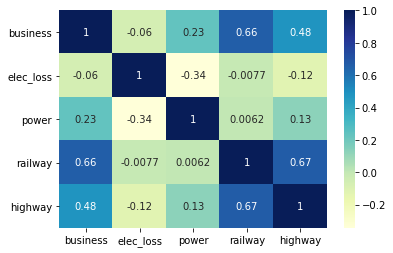

In [6]:
# Heatmap of correlation
sns.heatmap(df_reg.corr(), annot=True, cmap='YlGnBu')

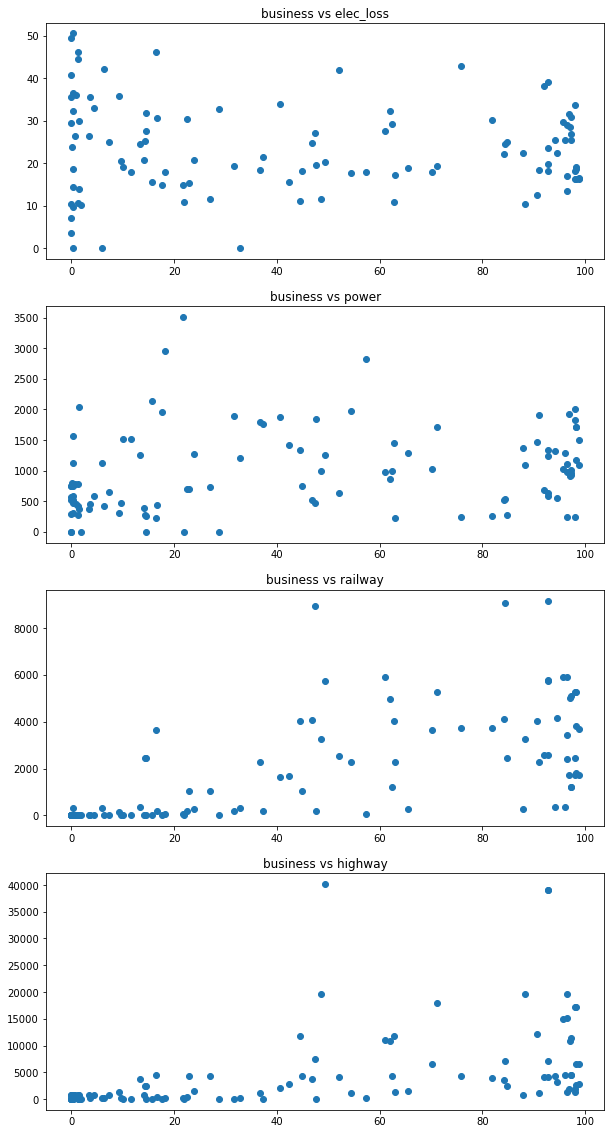

In [7]:
# Plotting scatter plots

fig, axs = plt.subplots(nrows = 4, ncols = 1, figsize=(10,20))

for i in range(len(df_reg.columns[1:])):
    axs[i].scatter(df_reg['business'], df_reg[df_reg.columns[1:][i]])
    axs[i].set_title("business vs " + df_reg.columns[1:][i])
plt.show()

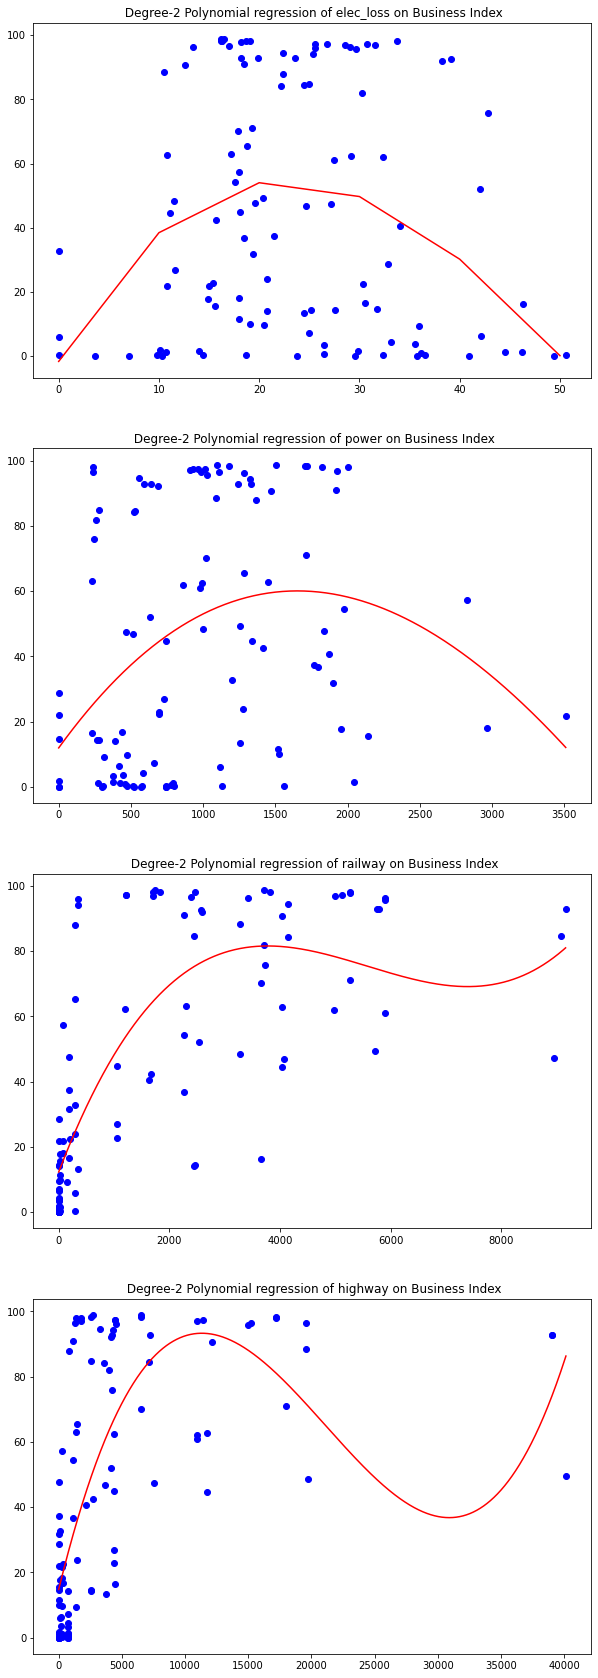

In [18]:
# Plotting the scatter plots as well as 3 degree regression plots of different columns with business

fig, axs = plt.subplots(nrows=4, ncols=1, figsize = (10, 30))

for i in range(len(df_reg.columns[1:])):
    
    X_train = pd.DataFrame(df_reg[df_reg.columns[1:][i]])
    Y_train = df_reg['business']
    
    poly = PolynomialFeatures(3)
    
    X_train_poly = poly.fit_transform(X_train)
    
    model = linear_model.LinearRegression()
    model.fit(X_train_poly, Y_train)
    
    coeff = model.coef_
    interc = model.intercept_
    
    x_axis = np.arange(min(X_train.iloc[:,0]), max(X_train.iloc[:,0]), 10)
    y_plot = interc + (coeff[1] * x_axis) + (coeff[2] * (x_axis**2)) + (coeff[3] * (x_axis**3))
    
    axs[i].plot(x_axis, y_plot, color='r')
    axs[i].scatter(X_train.values, Y_train, color='b')
    axs[i].set_title(" Degree-2 Polynomial regression of " + df_reg.columns[1:][i] + " on Business Index")
    
plt.show()

### As one can see, Electricity losses and per-capita availability of power have no real correlation with business index. Also, length of Highways and Railway routes have positive real correlation with business index

In [22]:
# Results with simple linear regression

X_train = df_reg.iloc[:,1:]
Y_train = df_reg['business']

poly = PolynomialFeatures(3)

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

coeff = model.coef_
interc = model.intercept_

for i in range(len(df_reg.columns[1:])):
    print("The coeff of " + df_reg.columns[1:][i] + " in the regression is " + str(coeff[i]))

The coeff of elec_loss in the regression is 0.10427675841660725
The coeff of power in the regression is 0.013475508705086335
The coeff of railway in the regression is 0.010858570242560256
The coeff of highway in the regression is 0.0001185823135962288
